In [ ]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
model = models.resnet18(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


In [ ]:
from PIL import Image

# Convert to PIL Image
pil_img = Image.fromarray(dataset.data[0])  # dataset.data[0] is a NumPy array (H x W x C)

# Resize and convert to tensor (without normalization)
unnorm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

orig_img_tensor = unnorm(pil_img)
orig_img = orig_img_tensor.permute(1, 2, 0).numpy()  # HWC


In [ ]:
from torchvision import datasets

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet18 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean/std
                         std=[0.229, 0.224, 0.225])
])

img_tensor, label = dataset[0]  # get one image and label
input_tensor = img_tensor.unsqueeze(0)  # add batch dimension

In [ ]:
# Collect all convolutional layers
conv_layers = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        conv_layers.append((name, module))


In [ ]:
output = model(input_tensor)
class_idx = output.argmax().item()
print(f"Predicted class index: {class_idx}")

model.zero_grad()
output[0, class_idx].backward()

Predicted class index: 841


In [ ]:
weights = gradients.mean(dim=(2, 3), keepdim=True)
cam = (weights * activations).sum(dim=1, keepdim=True)
cam = F.relu(cam)

cam = cam.squeeze().cpu().numpy()
cam = (cam - cam.min()) / (cam.max() - cam.min())
cam = cv2.resize(cam, (224, 224))


In [ ]:
weights = gradients.mean(dim=(2, 3), keepdim=True)  # Global Average Pooling
cam = (weights * activations).sum(dim=1, keepdim=True)
cam = F.relu(cam)

# Normalize
cam = cam.squeeze().cpu().numpy()
cam = (cam - cam.min()) / (cam.max() - cam.min())
cam = cv2.resize(cam, (224, 224))


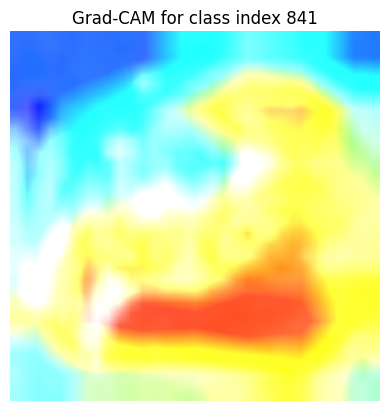

In [ ]:

from PIL import Image

# Convert the raw CIFAR-10 image (numpy) to PIL
pil_img = Image.fromarray(dataset.data[0])

# Resize to 224x224 and convert to tensor (but no normalization)
unnorm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
orig_img_tensor = unnorm(pil_img)
orig_img = orig_img_tensor.permute(1, 2, 0).numpy()  # HWC

# Grad-CAM visualization
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
heatmap = np.float32(heatmap) / 255
superimposed = heatmap + orig_img
superimposed = np.clip(superimposed, 0, 1)

plt.imshow(superimposed[..., ::-1])  # Convert BGR to RGB for matplotlib
plt.axis('off')
plt.title(f"Grad-CAM for class index {class_idx}")
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


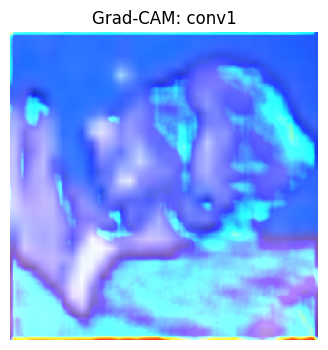

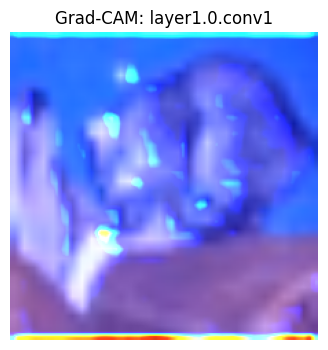

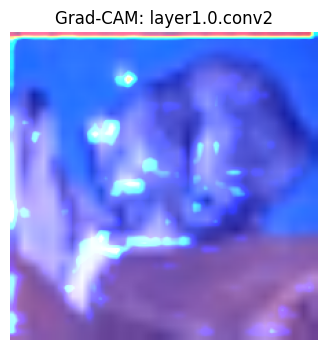

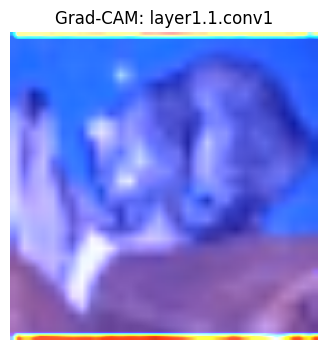

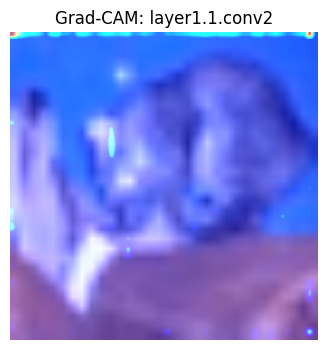

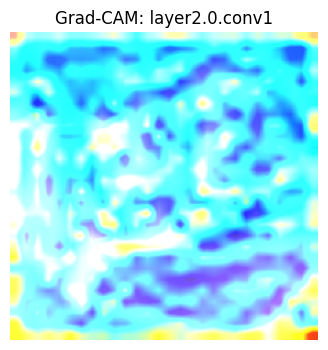

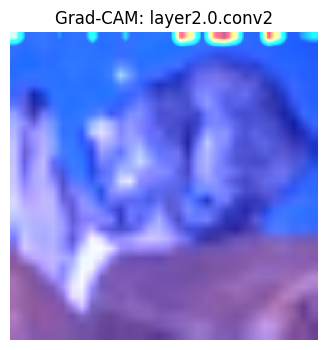

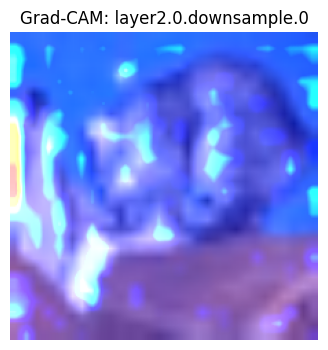

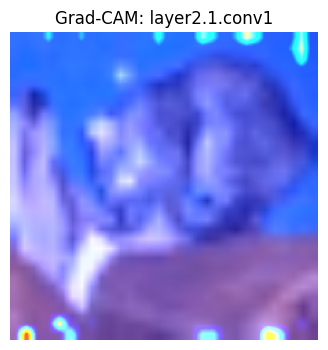

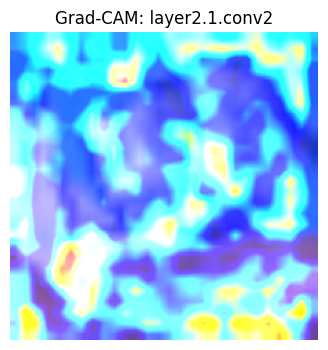

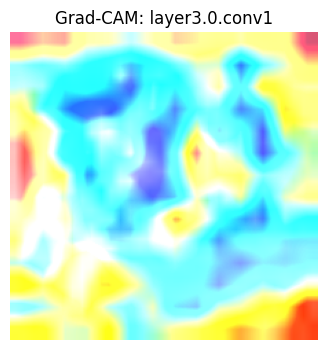

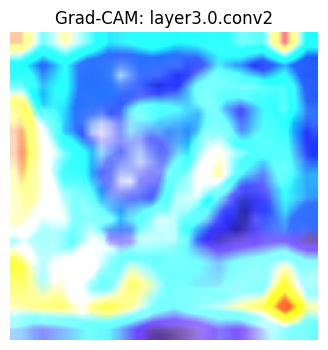

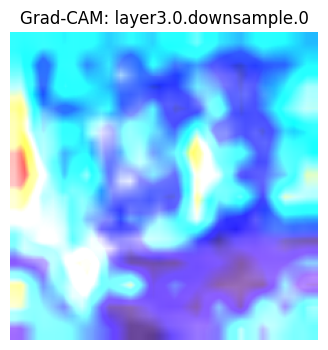

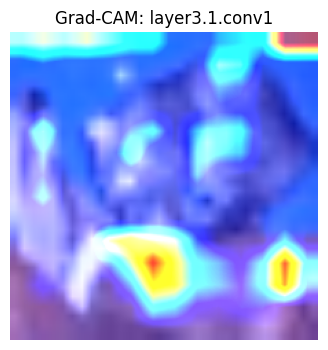

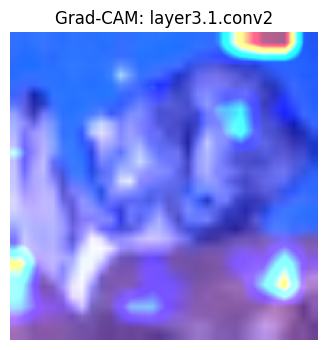

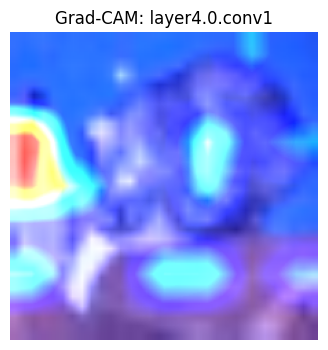

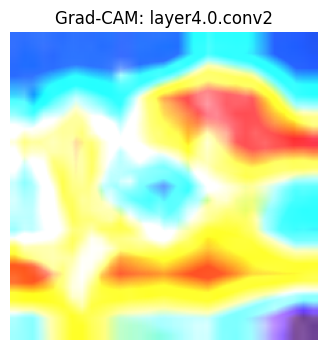

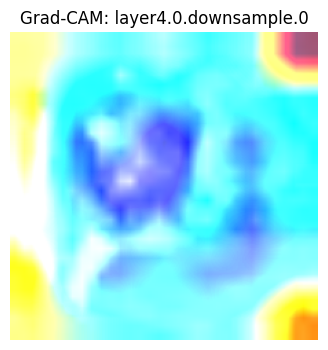

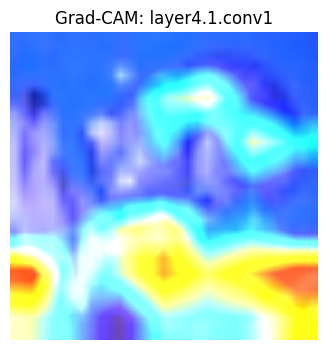

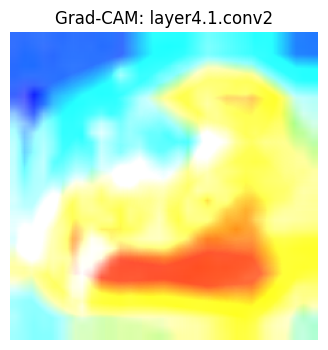

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# -------------------------------
# Load Dataset and Prepare Image
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
unnormalize = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# CIFAR-10
raw_dataset = CIFAR10(root='./data', train=False, download=True)
dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
img_tensor, true_label = dataset[0]
input_tensor = img_tensor.unsqueeze(0)

# Original image for overlay
orig_image = unnormalize(Image.fromarray(raw_dataset.data[0])).permute(1, 2, 0).numpy()

# -------------------------------
# Load Pretrained ResNet18
# -------------------------------
model = models.resnet18(pretrained=True)
model.eval()

# -------------------------------
# Loop over all Conv2d Layers
# -------------------------------
conv_layers = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        conv_layers.append((name, module))

# Grad-CAM for each conv layer
for layer_name, layer in conv_layers:
    # global activations, gradients
    # activations = None
    # gradients = None

    # Hook functions using global scope
    def forward_hook(module, input, output):
        global activations
        activations = output.detach()

    def backward_hook(module, grad_input, grad_output):
        global gradients
        gradients = grad_output[0].detach()

    # Register hooks
    handle_fwd = layer.register_forward_hook(forward_hook)
    handle_bwd = layer.register_full_backward_hook(backward_hook)  # use full hook

    # Forward + backward
    output = model(input_tensor)
    class_idx = output.argmax().item()
    model.zero_grad()
    output[0, class_idx].backward()

    # Remove hooks
    handle_fwd.remove()
    handle_bwd.remove()

    # Skip if shapes don't match
    if activations is None or gradients is None:
        continue

    # Shape: activations = [1, C, H, W], gradients = [1, C, H, W]
    activ = activations.squeeze(0)       # [C, H, W]
    grads = gradients.squeeze(0)         # [C, H, W]

    if activ.shape[0] != grads.shape[0]:
        print(f"Skipping layer {layer_name} due to channel mismatch.")
        continue

    # Compute weights and CAM
    weights = grads.mean(dim=(1, 2))     # [C]
    cam = torch.zeros(activ.shape[1:], dtype=torch.float32)

    for i, w in enumerate(weights):
        cam += w * activ[i]

    # Normalize
    cam = F.relu(cam)
    cam = cam.cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    cam = cv2.resize(cam, (224, 224))

    # Overlay heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    superimposed = np.clip(heatmap + orig_image, 0, 1)

    # Display
    plt.figure(figsize=(4, 4))
    plt.imshow(superimposed[..., ::-1])  # BGR to RGB
    plt.title(f"Grad-CAM: {layer_name}")
    plt.axis('off')
    plt.show()


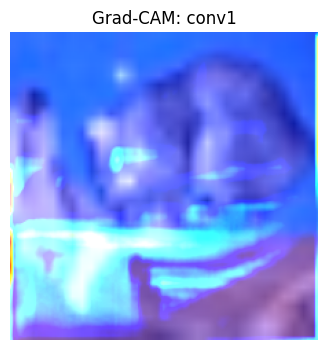

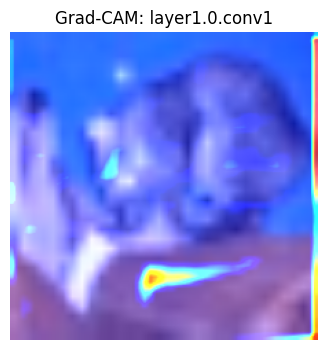

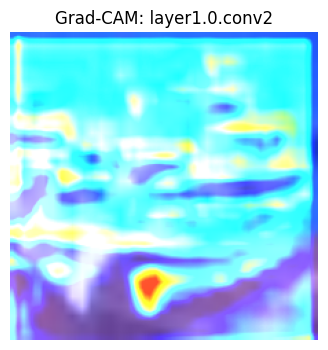

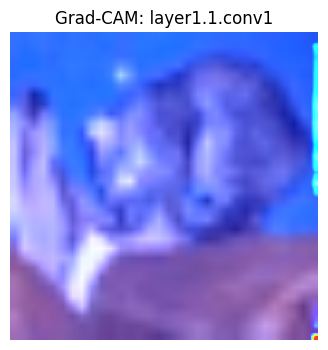

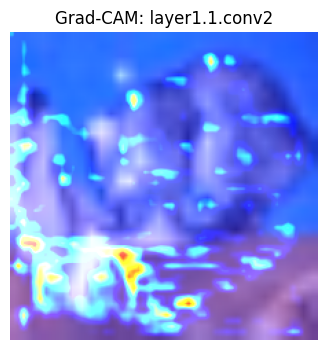

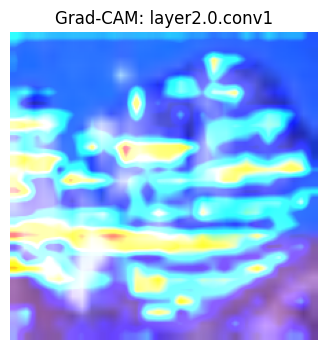

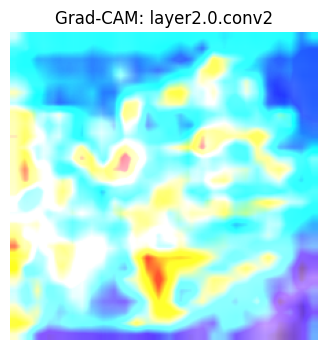

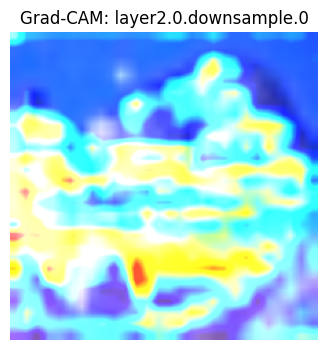

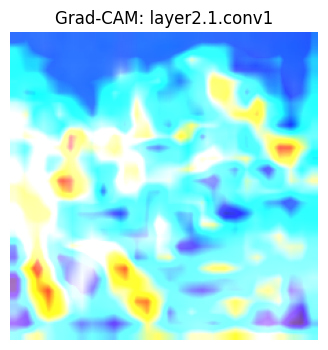

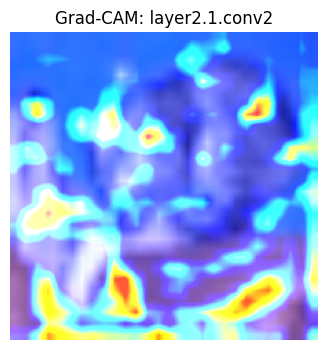

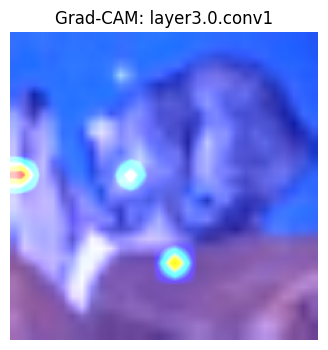

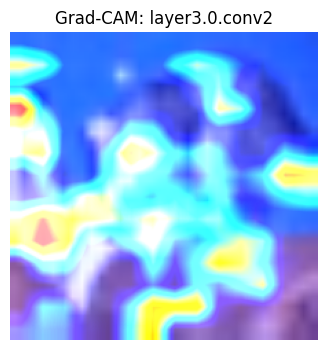

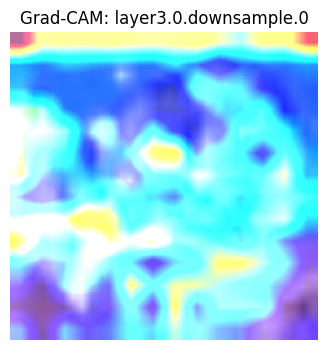

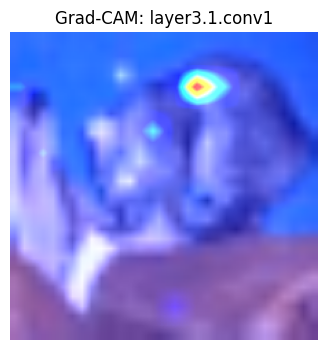

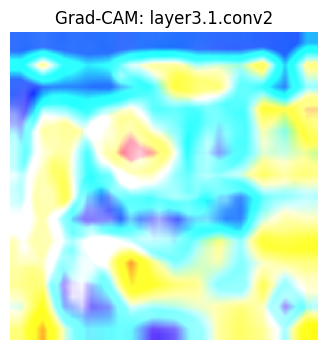

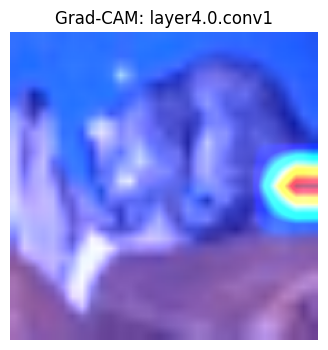

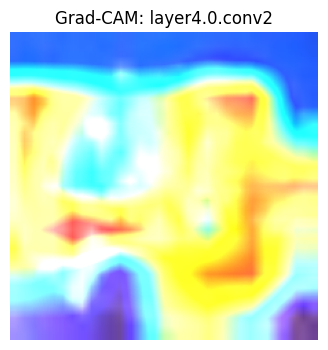

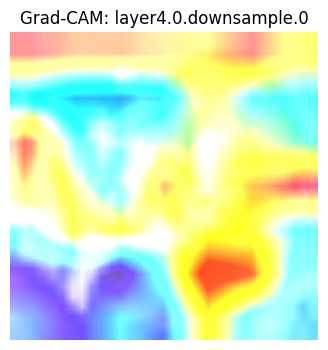

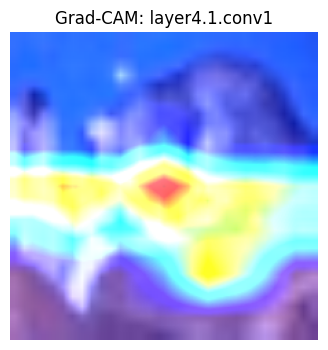

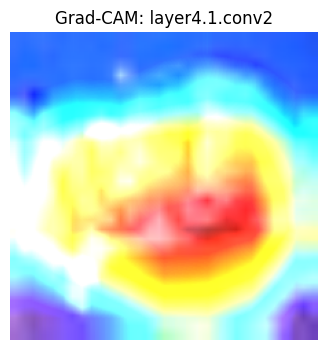

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# -------------------------------
# Load Dataset and Prepare Image
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
unnormalize = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# CIFAR-10
raw_dataset = CIFAR10(root='./data', train=False, download=True)
dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
img_tensor, true_label = dataset[1]
input_tensor = img_tensor.unsqueeze(0)

# Original image for overlay
orig_image = unnormalize(Image.fromarray(raw_dataset.data[0])).permute(1, 2, 0).numpy()

# -------------------------------
# Load Pretrained ResNet18
# -------------------------------
model = models.resnet18(pretrained=True)
model.eval()

# -------------------------------
# Loop over all Conv2d Layers
# -------------------------------
conv_layers = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        conv_layers.append((name, module))

# Grad-CAM for each conv layer
for layer_name, layer in conv_layers:
    # global activations, gradients
    # activations = None
    # gradients = None

    # Hook functions using global scope
    def forward_hook(module, input, output):
        global activations
        activations = output.detach()

    def backward_hook(module, grad_input, grad_output):
        global gradients
        gradients = grad_output[0].detach()

    # Register hooks
    handle_fwd = layer.register_forward_hook(forward_hook)
    handle_bwd = layer.register_full_backward_hook(backward_hook)  # use full hook

    # Forward + backward
    output = model(input_tensor)
    class_idx = output.argmax().item()
    model.zero_grad()
    output[0, class_idx].backward()

    # Remove hooks
    handle_fwd.remove()
    handle_bwd.remove()

    # Skip if shapes don't match
    if activations is None or gradients is None:
        continue

    # Shape: activations = [1, C, H, W], gradients = [1, C, H, W]
    activ = activations.squeeze(0)       # [C, H, W]
    grads = gradients.squeeze(0)         # [C, H, W]

    if activ.shape[0] != grads.shape[0]:
        print(f"Skipping layer {layer_name} due to channel mismatch.")
        continue

    # Compute weights and CAM
    weights = grads.mean(dim=(1, 2))     # [C]
    cam = torch.zeros(activ.shape[1:], dtype=torch.float32)

    for i, w in enumerate(weights):
        cam += w * activ[i]

    # Normalize
    cam = F.relu(cam)
    cam = cam.cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    cam = cv2.resize(cam, (224, 224))

    # Overlay heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    superimposed = np.clip(heatmap + orig_image, 0, 1)

    # Display
    plt.figure(figsize=(4, 4))
    plt.imshow(superimposed[..., ::-1])  # BGR to RGB
    plt.title(f"Grad-CAM: {layer_name}")
    plt.axis('off')
    plt.show()


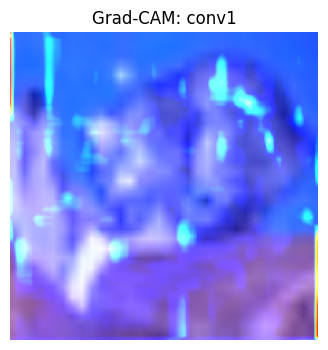

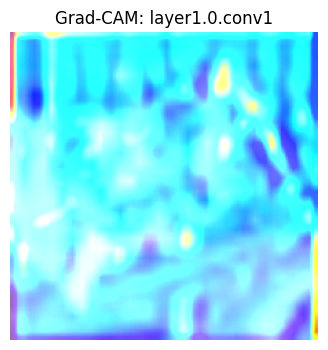

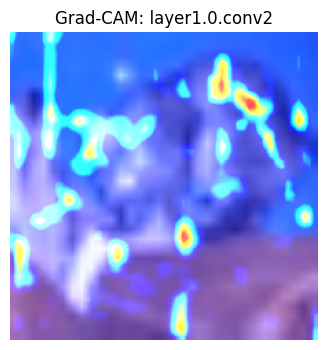

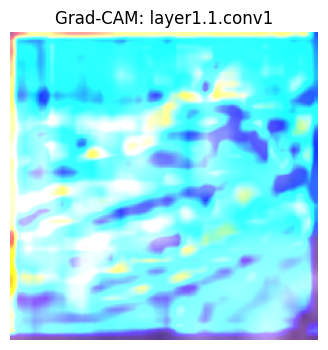

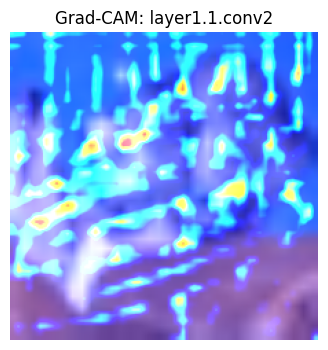

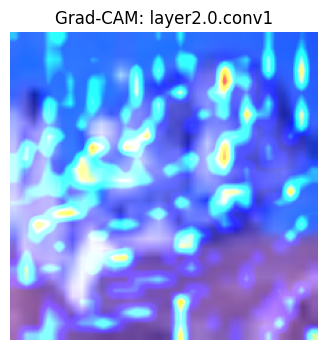

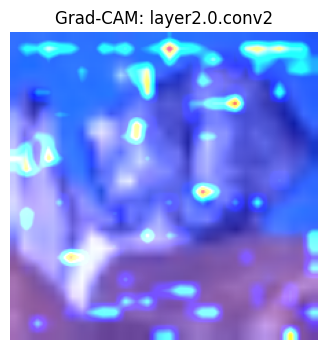

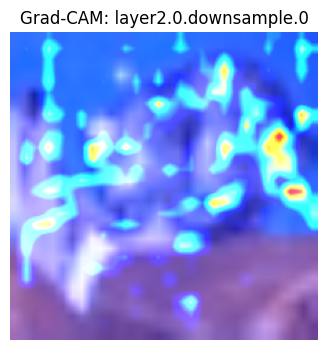

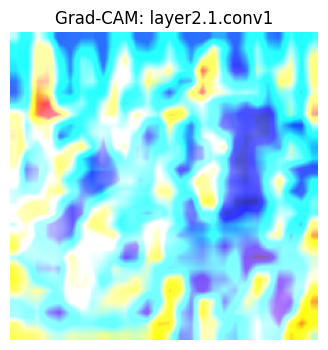

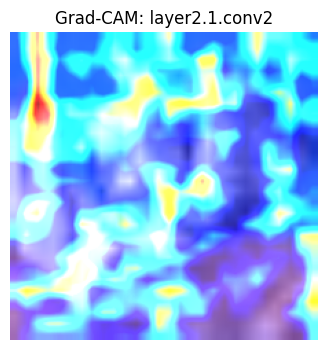

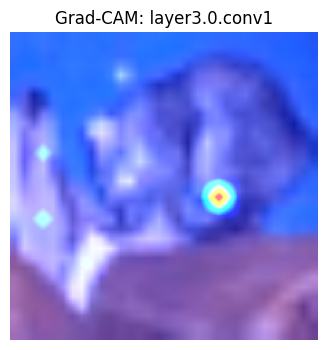

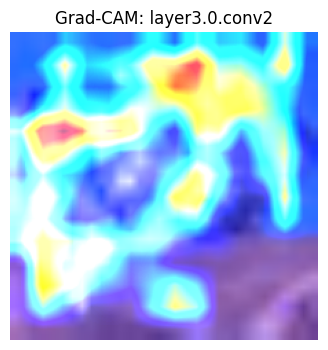

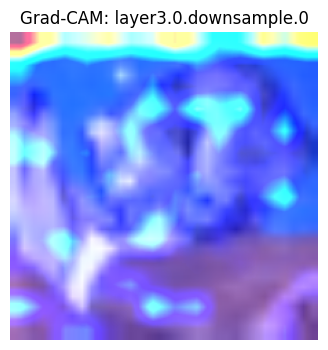

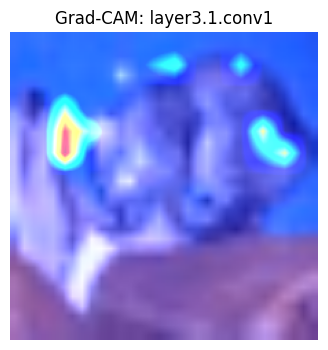

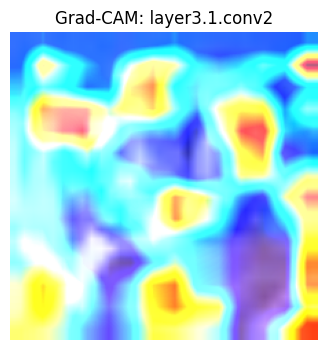

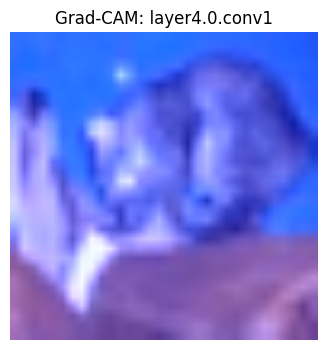

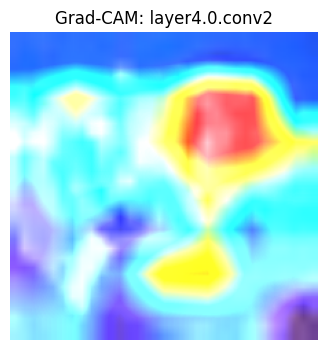

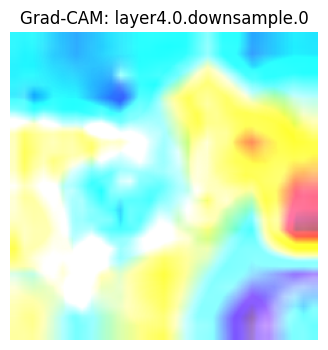

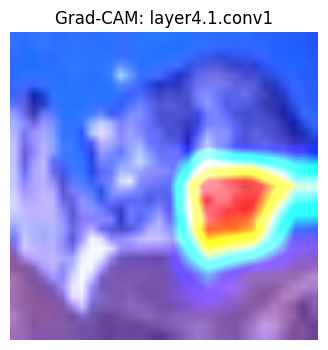

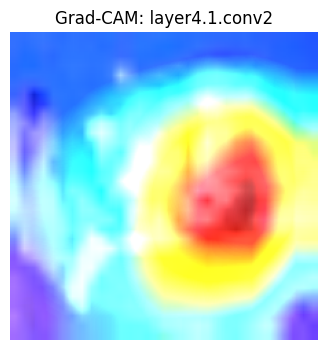

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# -------------------------------
# Load Dataset and Prepare Image
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
unnormalize = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# CIFAR-10
raw_dataset = CIFAR10(root='./data', train=False, download=True)
dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
img_tensor, true_label = dataset[2]
input_tensor = img_tensor.unsqueeze(0)

# Original image for overlay
orig_image = unnormalize(Image.fromarray(raw_dataset.data[0])).permute(1, 2, 0).numpy()

# -------------------------------
# Load Pretrained ResNet18
# -------------------------------
model = models.resnet18(pretrained=True)
model.eval()

# -------------------------------
# Loop over all Conv2d Layers
# -------------------------------
conv_layers = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        conv_layers.append((name, module))

# Grad-CAM for each conv layer
for layer_name, layer in conv_layers:
    global activations, gradients
    activations = None
    gradients = None

    # Hook functions using global scope
    def forward_hook(module, input, output):
        global activations
        activations = output.detach()

    def backward_hook(module, grad_input, grad_output):
        global gradients
        gradients = grad_output[0].detach()

    # Register hooks
    handle_fwd = layer.register_forward_hook(forward_hook)
    handle_bwd = layer.register_full_backward_hook(backward_hook)  # use full hook

    # Forward + backward
    output = model(input_tensor)
    class_idx = output.argmax().item()
    model.zero_grad()
    output[0, class_idx].backward()

    # Remove hooks
    handle_fwd.remove()
    handle_bwd.remove()

    # Skip if shapes don't match
    if activations is None or gradients is None:
        continue

    # Shape: activations = [1, C, H, W], gradients = [1, C, H, W]
    activ = activations.squeeze(0)       # [C, H, W]
    grads = gradients.squeeze(0)         # [C, H, W]

    if activ.shape[0] != grads.shape[0]:
        print(f"Skipping layer {layer_name} due to channel mismatch.")
        continue

    # Compute weights and CAM
    weights = grads.mean(dim=(1, 2))     # [C]
    cam = torch.zeros(activ.shape[1:], dtype=torch.float32)

    for i, w in enumerate(weights):
        cam += w * activ[i]

    # Normalize
    cam = F.relu(cam)
    cam = cam.cpu().numpy()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    cam = cv2.resize(cam, (224, 224))

    # Overlay heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    superimposed = np.clip(heatmap + orig_image, 0, 1)

    # Display
    plt.figure(figsize=(4, 4))
    plt.imshow(superimposed[..., ::-1])  # BGR to RGB
    plt.title(f"Grad-CAM: {layer_name}")
    plt.axis('off')
    plt.show()
